In [29]:
# Homework 3
# Question 1
# referenes: https://www.section.io/engineering-education/image-compression-using-pca/, https://www.askpython.com/python/examples/principal-component-analysis, https://www.researchgate.net/figure/Cumulative-variance-amount-of-variance-of-the-original-data-explained-by-each-type-of_fig2_228881322#:~:text=by%20Sascha%20Fagel-,Cumulative%20variance%3A%20amount%20of%20variance%20of%20the%20original%20data%20explained,against%20the%20number%20of%20components.


#import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def pca(file, components):
    img = cv2.imread(file)
    # show image as RGB instead of BGR
    plt.imshow(img[...,::-1])
    # convert image to rgb and save each color band as a variable
    rgb_img = img[...,::-1]
    red, green, blue = cv2.split(rgb_img)
    # create an array with each color band
    colors = np.array([red, green, blue])
    # initialize arrays for variance and projected color
    variance = []
    proj = [[],[],[]]
    for i in range(len(colors)):
        # find the mean of each color and subtract it from the values to calculate covariance matrix
        mean_color = np.mean(colors[i], axis=0)
        mean_sub = colors[i] - mean_color
        covar_matrix = np.cov(mean_sub, rowvar = False)
        # use the covariance matrix to calculate eigenvalues and eigenvectors
        evals, evecs = np.linalg.eigh(covar_matrix)
        # sort evals and evecs in descending order
        sort_ind = np.argsort(evals)[::-1]
        sorted_evals = evals[sort_ind]
        sorted_evecs = evecs[:,sort_ind]
        variance.append(sum(sorted_evals[0:components])/sum(sorted_evals))
        # use given components variable to select the vectors to be used
        selected_comps = sorted_evecs[:,0:components]
        # reduced color image
        reduced_img = np.dot(mean_sub, selected_comps)
        # add the mean back in to project the color using our components
        proj_img = np.dot(reduced_img, selected_comps.T) + mean_color
        proj[i].append(proj_img)
        
    #use projections to re-create the image
    constructed_img = (np.dstack((proj[0][0], proj[1][0], proj[2][0]))).astype(np.uint8)
    # return the image and variance matrix
    return constructed_img, variance
        
        

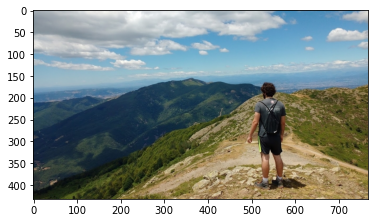

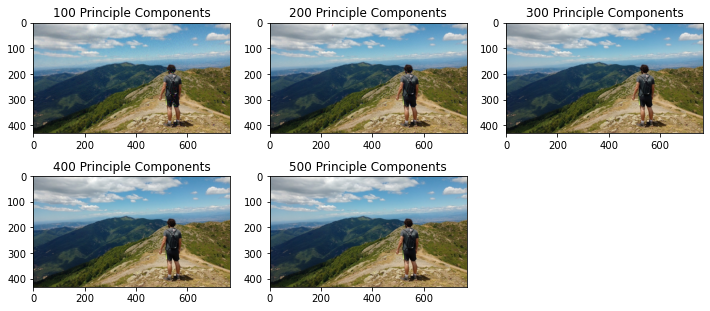

In [26]:
principle_components = [100,200,300,400,500]
images = []
red_var = []
green_var = []
blue_var = []

for i in range(len(principle_components)):
    img, variances = pca('C:\\Users\\aidan\\FA_2022\\Applied_ML\\HW3\\hw3_1.jpeg', principle_components[i])
    red_var.append(variances[0])
    green_var.append(variances[1])
    blue_var.append(variances[2])
    images.append(img)

fig = plt.figure(figsize=(12, 8))
for i in range (len(images)):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'{principle_components[i]} Principle Components')
plt.show()

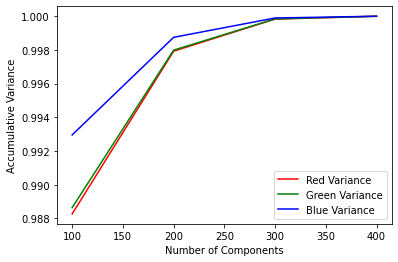

In [31]:
plt.plot(principle_components[0:4], red_var[0:4], color='red')
plt.plot(principle_components[0:4], green_var[0:4], color='green')
plt.plot(principle_components[0:4], blue_var[0:4], color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Accumulative Variance')
plt.legend(('Red Variance', 'Green Variance', 'Blue Variance'))
plt.show()